In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
shipping = pd.read_csv('df_encoded.csv')
list(shipping.columns)

['BookingID',
 'BookingID_Date',
 'vehicle_no',
 'Origin_Location',
 'Destination_Location',
 'Org_lat_lon',
 'Des_lat_lon',
 'Data_Ping_time',
 'Planned_ETA',
 'Current_Location',
 'actual_eta',
 'Curr_lat',
 'Curr_lon',
 'ontime',
 'delay',
 'OriginLocation_Code',
 'DestinationLocation_Code',
 'trip_start_date',
 'trip_end_date',
 'TRANSPORTATION_DISTANCE_IN_KM',
 'Minimum_kms_to_be_covered_in_a_day',
 'supplierID',
 'Material Shipped',
 'Booking_Year',
 'Booking_Month',
 'Booking_Day',
 'is_delayed',
 'vehicleType_-1',
 'vehicleType_0',
 'vehicleType_1',
 'vehicleType_2',
 'vehicleType_3',
 'vehicleType_4',
 'vehicleType_5',
 'vehicleType_6',
 'vehicleType_7',
 'vehicleType_8',
 'vehicleType_9',
 'vehicleType_10',
 'vehicleType_11',
 'vehicleType_12',
 'vehicleType_13',
 'vehicleType_14',
 'vehicleType_15',
 'vehicleType_16',
 'vehicleType_17',
 'vehicleType_18',
 'vehicleType_19',
 'vehicleType_20',
 'vehicleType_21',
 'vehicleType_22',
 'vehicleType_23',
 'vehicleType_24',
 'vehic

In [ ]:
simple = shipping.drop(['BookingID',
 'BookingID_Date',
 'vehicle_no',
 'Origin_Location',
 'Destination_Location',
 'Org_lat_lon',
 'Des_lat_lon',
 'Data_Ping_time',
 'Planned_ETA',
 'Current_Location',
 'actual_eta',
 'Curr_lat',
 'Curr_lon',
 'ontime',
 'delay',
 'OriginLocation_Code',
 'DestinationLocation_Code',
 'trip_start_date',
 'trip_end_date','Minimum_kms_to_be_covered_in_a_day',
 'supplierID',
 'Material Shipped',
'Market/Regular_0',
 'Market/Regular_1'], axis=1)

In [ ]:
missing_percentage = (simple.isna().sum() / len(simple)) * 100
print(missing_percentage)

TRANSPORTATION_DISTANCE_IN_KM    10.245542
Booking_Year                      0.000000
Booking_Month                     0.000000
Booking_Day                       0.000000
is_delayed                        0.000000
                                   ...    
GpsProvider_24                    0.000000
GpsProvider_25                    0.000000
GpsProvider_26                    0.000000
GpsProvider_27                    0.000000
GpsProvider_28                    0.000000
Length: 80, dtype: float64


In [ ]:
# Remove rows with any NA values
shipping_clean = simple.dropna()
shipping_clean.shape

(6141, 80)

In [ ]:
#Splitting training and testing data
train, test = train_test_split(shipping_clean, test_size=0.2, random_state=2024)

In [ ]:
#Y variable and X variables
x_train = train.drop(['is_delayed'], axis=1)
y_train = train['is_delayed']

x_test= test.drop(['is_delayed'], axis=1)
y_test = test['is_delayed']

In [ ]:
#Performance Metric Function (TPR, FPR)
def performance(Y_pred, Y_test, X_test):
    cm = confusion_matrix(Y_test, Y_pred)
    TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
    FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
    return TPR, FPR

In [ ]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)
lda_acc = accuracy_score(y_test, y_pred_lda)
lda_tpr, lda_fpr = performance(y_pred_lda, y_test, x_test)

print(f'LDA Test Accuracy: {lda_acc:.4f}, LDA TPR: {lda_tpr}, LDA FPR: {lda_fpr}')

LDA Test Accuracy: 0.8869, LDA TPR: 0.9728453364817001, LDA FPR: 0.3036649214659686


In [ ]:
#Decision Tree Classifier (CART)
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}
dtc = DecisionTreeClassifier(random_state=2024)
cv = KFold(n_splits=5, random_state=2024, shuffle=True)

dtc_cv = GridSearchCV(dtc, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=0)
dtc_cv_model = dtc_cv.fit(x_train, y_train)

best_ccp_alpha = float(dtc_cv_model.best_params_['ccp_alpha'])

opt_dtc = DecisionTreeClassifier(min_samples_split=10,
                            ccp_alpha=best_ccp_alpha,
                            random_state = 2024)

dtc_final = opt_dtc.fit(x_train, y_train)

y_pred_dtc = dtc_final.predict(x_test)
dtc_acc = accuracy_score(y_test, y_pred_dtc)

dtc_tpr, dtc_fpr = performance(y_pred_dtc, y_test, x_test)

print(f'CART Test Accuracy: {dtc_acc:.4f}, CART TPR: {dtc_tpr}, CART FPR: {dtc_fpr}')
print(f'Best ccp_alpha: {best_ccp_alpha:.4f}')

CART Test Accuracy: 0.9300, CART TPR: 0.9716646989374262, CART FPR: 0.16230366492146597
Best ccp_alpha: 0.0010


In [ ]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=200, max_leaf_nodes=10, random_state=2024)
gbc_model = gbc.fit(x_train, y_train)
y_pred_gbc = gbc_model.predict(x_test)

gbc_acc = accuracy_score(y_test,y_pred_gbc)

gbc_tpr, gbc_fpr = performance(y_pred_gbc, y_test, x_test)

print(f'GBC Test Accuracy: {gbc_acc:.4f}, GBC TPR: {gbc_tpr}, GBC FPR: {gbc_fpr}')

GBC Test Accuracy: 0.9325, GBC TPR: 0.9598583234946871, GBC FPR: 0.12827225130890052


In [ ]:
#Table Comparing all of the Model's Performance Metrics
results = pd.DataFrame({
    'Model': ['LDA', 'CART', 'Gradient Boosting Classifier'],
    'Accuracy': [lda_acc, dtc_acc, gbc_acc],
    'TPR': [lda_tpr, dtc_tpr, gbc_tpr],
    'FPR': [lda_fpr, dtc_fpr, gbc_fpr]
})
results

,Model,Accuracy,TPR,FPR
0,LDA,0.886900,0.972845,0.303665
1,CART,0.930024,0.971665,0.162304
2,Gradient Boosting Classifier,0.932465,0.959858,0.128272


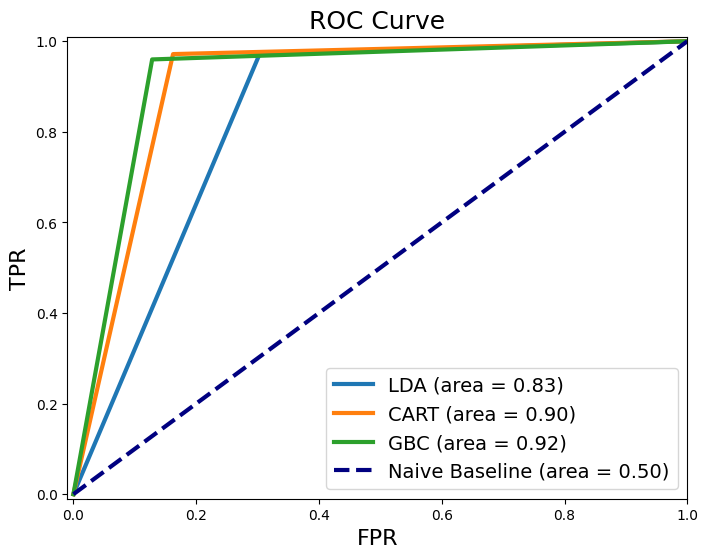

In [ ]:
#ROC Curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Model 1: LDA
fpr1, tpr1, _ = roc_curve(y_test, y_pred_lda)
roc_auc1 = auc(fpr1, tpr1)

# Model 2: CART
fpr2, tpr2, _ = roc_curve(y_test, y_pred_dtc)
roc_auc2 = auc(fpr2, tpr2)

# Model 3: GBC
fpr3, tpr3, _ = roc_curve(y_test,y_pred_gbc )
roc_auc3 = auc(fpr3, tpr3)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, lw=3, label='CART (area = {:0.2f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, lw=3, label='GBC (area = {:0.2f})'.format(roc_auc3))

# Plot the baseline
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')


# Add labels and legend
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=14)
plt.show()